In [1]:
import pandas as pd
import numpy as np
import json
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import ppscore as pps
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

/Users/galby/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df1= pd.read_csv('first_time.csv')

In [3]:
df2= pd.read_csv('second_time.csv')

In [4]:
df1.shape

(96682, 113)

In [5]:
df2.shape

(96682, 114)

In [6]:
sum(df1.userid==df2.userid)

96682

In [7]:
df_all=df1.merge(df2, left_on='userid', right_on='userid')

In [8]:
df_all.shape
df_all

Unnamed: 0_x                            userid  q1_x  q2_x  q3_x  q4_x  \
0                 1  00001627067cf12b1923f02bb1a3b731     5     3     4     5   
1                 2  00012a984f255e4ab51c8a6a0c9d6b15     5     2     1     3   
2                 3  00023873f9306e71438231a48dac55ba     5     1     4     5   
3                 4  0002635cdf57eda33037191555445323     4     4     3     4   
4                 5  0004c063f9b20fa34b1391e89b3f84cf     5     3     3     3   
...             ...                               ...   ...   ...   ...   ...   
96677         96678  fffb31e6576a213ac2da1207ed36739e     5     3     4     4   
96678         96679  fffcf4df2fdac21ab3b2d2ac2d798dd3     5     5     5     4   
96679         96680  fffda4e7ae425c41f69369effb8a6c6c     4     4     5     2   
96680         96681  fffe84cfc564a05ad024bb21a8dde75b     4     3     3     2   
96681         96682  fffeb6a139d878294c2bc8dcb6f194ed     4     1     5     5   

       q5_x  q6_x  q7_x  q8_x  q9_x  q10_x  q11_x  q12_x  q13_x  q14_x  q15_x  \
0         4     3     3     4     5      5      2      2      4      4      4   
1         5     2     5     1     5      5      3      4      4      1      4   
2         4     4     5     3     5      3      3      4      5      5      5   
3         4     4     4     2     3      2      3      4      2      2      3   
4         5     3     3     1     5      5      2      4      4      3      5   
...     ...   ...   ...   ...   ...    ...    ...    ...    ...    ...    ...   
96677     4     3     5     2     2      2      4      4      5      1      4   
96678     4     5     4     4     5      5      2      2      5      5      4   
96679     5     4     5     4     4      5      1      1      4      5      2   
96680     4     3     4     3     4      4      2      2      3      3      3   
96681     2     2     3     1     1      3      5      5      2      5      1   

       q16_x  q17_x  q18_x  q19_x  q20_x  q21_x  q22_x  q23_x  q24_x  q25_x  \
0          5      4      5      3      4      4      4      5      3      4   
1          5      5      2      3      5      4      3      4      3      3   
2          5      2      3      2      4      5      3      4      5      3   
3          2      2      3      3      4      3      2      4      4      3   
4          5      5      5      4      4      4      2      5      3      5   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
96677      5      1      5      4      2      5      3      4      5      5   
96678      2      4      5      2      5      5      2      5      4      4   
96679      4      1      5      1      4      4      4      4      3      2   
96680      4      3      4      3      3      3      2      4      4      2   
96681      5      4      5      4      2      5      1      5      4      1   

       q26_x  q27_x  q28_x  q29_x  q30_x  q31_x  q32_x  q33_x  q34_x  q35_x  \
0          5      3      4      5      2      4      4      4      5      4   
1          2      5      5      1      3      5      4      1      5      3   
2          5      3      4      3      3      5      3      4      5      3   
3          4      4      2      2      3      4      4      3      2      4   
4          4      2      2      5      3      5      3      5      4      4   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
96677      4      4      2      5      2      5      4      2      4      4   
96678      5      1      4      5      1      5      5      5      5      4   
96679      4      2      4      4      1      5      4      4      5      5   
96680      4      3      3      5      2      5      3      3      3      2   
96681      4      2      1      5      4      2      1      4      4      2   

       q36_x  q37_x  q38_x  q39_x  q40_x  q41_x  q42_x  q43_x  q44_x  q45_x  \
0          5      2      4      5      2      4      4      4      3      4   
1    

In [10]:
sub_df = df_all[['E_x','A_x','O_x','N_x','C_x','E_y','A_y','O_y','N_y','C_y','V1_x','V2_x','V3_x', 'V4_x','V5_x','V1_y','V2_y','V3_y', 'V4_y','V5_y']]
sub_df['V1_x']=sub_df['V1_x']*(-1)
sub_df['V2_x']=sub_df['V2_x']*(-1)
sub_df['V4_x']=sub_df['V4_x']*(-1)
sub_df['V1_y']=sub_df['V1_y']*(-1)
sub_df['V2_y']=sub_df['V2_y']*(-1)
sub_df['V4_y']=sub_df['V4_y']*(-1)


/Users/galby/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/galby/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/galby/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [11]:
sub_df.corr()

E_x       A_x       O_x       N_x       C_x       E_y       A_y  \
E_x   1.000000  0.238882  0.207156 -0.413620  0.233236  0.861236  0.198219   
A_x   0.238882  1.000000  0.113200 -0.399000  0.233361  0.204163  0.830818   
O_x   0.207156  0.113200  1.000000 -0.077185  0.060431  0.165097  0.072846   
N_x  -0.413620 -0.399000 -0.077185  1.000000 -0.368319 -0.362020 -0.343868   
C_x   0.233236  0.233361  0.060431 -0.368319  1.000000  0.200422  0.189824   
E_y   0.861236  0.204163  0.165097 -0.362020  0.200422  1.000000  0.254751   
A_y   0.198219  0.830818  0.072846 -0.343868  0.189824  0.254751  1.000000   
O_y   0.171933  0.073265  0.816062 -0.057323  0.026292  0.223911  0.125599   
N_y  -0.353896 -0.336755 -0.056835  0.836962 -0.317421 -0.426553 -0.402104   
C_y   0.205622  0.195497  0.027418 -0.320961  0.829824  0.246116  0.235300   
V1_x  0.807256  0.105815  0.039345 -0.235988  0.124956  0.705728  0.092734   
V2_x -0.139159 -0.180622 -0.098842  0.687297 -0.295305 -0.119683 -0.157549   
V3_x  0.308898  0.569698 -0.016941 -0.291255  0.343096  0.268429  0.480105   
V4_x  0.014690  0.448695  0.445843  0.147188 -0.038930  0.004322  0.364196   
V5_x  0.127150 -0.086130  0.535802 -0.084216 -0.178551  0.108656 -0.076917   
V1_y  0.717873  0.101274  0.038300 -0.220180  0.115894  0.811160  0.115229   
V2_y -0.113680 -0.150973 -0.069658  0.582463 -0.256379 -0.164469 -0.189747   
V3_y  0.265223  0.485543 -0.042279 -0.240063  0.294884  0.317661  0.580509   
V4_y  0.005144  0.372772  0.371549  0.127951 -0.042077  0.022252  0.457216   
V5_y  0.102573 -0.085465  0.468135 -0.054365 -0.171723  0.129395 -0.076086   

           O_y       N_y       C_y      V1_x      V2_x      V3_x      V4_x  \
E_x   0.171933 -0.353896  0.205622  0.807256 -0.139159  0.308898  0.014690   
A_x   0.073265 -0.336755  0.195497  0.105815 -0.180622  0.569698  0.448695   
O_x   0.816062 -0.056835  0.027418  0.039345 -0.098842 -0.016941  0.445843   
N_x  -0.057323  0.836962 -0.320961 -0.235988  0.687297 -0.291255  0.147188   
C_x   0.026292 -0.317421  0.829824  0.124956 -0.295305  0.343096 -0.038930   
E_y   0.223911 -0.426553  0.246116  0.705728 -0.119683  0.268429  0.004322   
A_y   0.125599 -0.402104  0.235300  0.092734 -0.157549  0.480105  0.364196   
O_y   1.000000 -0.096634  0.065956  0.038519 -0.062274 -0.033775  0.372724   
N_y  -0.096634  1.000000 -0.380948 -0.213988  0.577089 -0.233794  0.120861   
C_y   0.065956 -0.380948  1.000000  0.119499 -0.248041  0.301552 -0.049136   
V1_x  0.038519 -0.213988  0.119499  1.000000 -0.016959  0.026909  0.017797   
V2_x -0.062274  0.577089 -0.248041 -0.016959  1.000000 -0.006762  0.034590   
V3_x -0.033775 -0.233794  0.301552  0.026909 -0.006762  1.000000  0.022658   
V4_x  0.372724  0.120861 -0.049136  0.017797  0.034590  0.022658  1.000000   
V5_x  0.460471 -0.061443 -0.158611 -0.010501 -0.010623 -0.005914 -0.023202   
V1_y  0.050543 -0.243668  0.130566  0.793574 -0.028008  0.087569 -0.001331   
V2_y -0.111392  0.705272 -0.309323 -0.024384  0.739373 -0.021313  0.062761   
V3_y -0.007483 -0.303796  0.353573  0.083761 -0.022959  0.702500  0.063448   
V4_y  0.438429  0.151143 -0.041186 -0.002864  0.066888  0.069386  0.696675   
V5_y  0.543973 -0.090397 -0.178555  0.007465 -0.019560 -0.077454  0.058869   

          V5_x      V1_y      V2_y      V3_y      V4_y      V5_y  
E_x   0.127150  0.717873 -0.113680  0.265223  0.005144  0.102573  
A_x  -0.086130  0.101274 -0.150973  0.485543  0.372772 -0.085465  
O_x   0.535802  0.038300 -0.069658 -0.042279  0.371549  0.468135  
N_x  -0.084216 -0.220180  0.582463 -0.240063  0.127951 -0.054365  
C_x  -0.178551  0.115894 -0.256379  0.294884 -0.042077 -0.171723  
E_y   0.108656  0.811160 -0.164469  0.317661  0.022252  0.129395  
A_y  -0.076917  0.115229 -0.189747  0.580509  0.457216 -0.076086  
O_y   0.460471  0.050543 -0.111392 -0.007483  0.438429  0.543973  
N_y  -0.061443 -0.243668  0.705272 -0.303796  0.151143 -0.090397  
C_y  -0.158611  0.130566 -0.309323  0.353573 -0.041186 -0.17855

In [27]:

c = np.array([[ 7 ,2,3]]) 
d = np.array([[1,5,3]]) 

type(c)

numpy.ndarray

In [17]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(c,d)

array([[0.55814043]])

In [12]:
def get_cosine_ffm1_ffm2(row):
    a = np.array([[row['E_x'],row['A_x'],row['O_x'],row['N_x'],row['C_x']]])
    b = np.array([[row['E_y'],row['A_y'],row['O_y'],row['N_y'],row['C_y']]])
    return  cosine_similarity(a,b)             

In [13]:
def get_cosine_ffm1_pf1(row):
    a = np.array([[row['O_x'],row['C_x'],row['E_x'],row['A_x'],row['N_x']]])
    b = np.array([[row['V5_x'],row['V3_x'],row['V1_x'],row['V4_x'],row['V2_x']]])
    return  cosine_similarity(a,b)             

In [14]:
def get_cosine_pf1_pf2(row):
    a = np.array([[row['V1_y'],row['V2_y'],row['V3_y'],row['V4_y'],row['V5_y']]])
    b = np.array([[row['V1_x'],row['V2_x'],row['V3_x'],row['V4_x'],row['V5_x']]])
    return  cosine_similarity(a,b)             

In [15]:
def get_cosine_ffm2_pf2(row):
    a = np.array([[row['O_y'],row['C_y'],row['E_y'],row['A_y'],row['N_y']]])
    b = np.array([[row['V5_y'],row['V3_y'],row['V1_y'],row['V4_y'],row['V2_y']]])
    return  cosine_similarity(a,b)             

In [16]:
sub_df['ffm1_ffm2'] =sub_df.apply(lambda row: get_cosine_ffm1_ffm2(row), axis=1)
sub_df['ffm2_pf2'] =sub_df.apply(lambda row: get_cosine_ffm2_pf2(row), axis=1)
sub_df['ffm1_pf1'] =sub_df.apply(lambda row: get_cosine_ffm1_pf1(row), axis=1)
sub_df['pf1_pf2'] =sub_df.apply(lambda row: get_cosine_pf1_pf2(row), axis=1)


/Users/galby/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/galby/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/galby/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [ ]:
#sub_df['ffm1_pf1_mix'] =sub_df.apply(lambda row: get_cosine_ffm1_pf1(row), axis=1)
#sub_df['ffm1_pf1_mix2'] =sub_df.apply(lambda row: get_cosine_ffm1_pf1(row), axis=1)
sub_df.to_csv('cosine_df_ordered_no_minus.csv', index = False)

In [16]:
sub_df= pd.read_csv('cosine_df_ordered_no_minus.csv')
sub_df

E_x   A_x   O_x   N_x   C_x   E_y   A_y   O_y   N_y   C_y        V1_x  \
0      4.65  3.95  4.15  3.10  4.15  4.45  4.25  4.30  3.15  4.25  154.579913   
1      2.20  3.40  4.00  3.25  3.80  2.50  3.65  4.20  3.35  4.70   29.010352   
2      3.50  3.90  4.85  3.20  3.55  3.45  4.30  4.70  3.10  3.10   93.032941   
3      2.85  3.15  3.30  3.05  3.10  2.95  3.45  3.70  2.75  3.60  101.538122   
4      4.00  3.90  3.55  2.75  3.90  3.30  4.10  3.45  2.60  3.90  147.120929   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...         ...   
96677  3.10  3.25  4.75  2.65  3.35  2.90  2.80  4.70  2.70  4.00   79.765713   
96678  4.90  4.45  4.40  1.90  4.10  4.80  4.50  4.30  1.50  4.40  188.693034   
96679  4.65  3.75  4.35  1.30  3.80  4.65  3.75  4.35  1.30  3.80  198.230854   
96680  3.60  3.00  3.80  2.75  3.15  3.25  3.10  3.85  2.65  3.15   71.394708   
96681  4.45  2.60  4.10  4.10  1.40  4.80  3.15  4.45  3.15  2.15  172.136892   

            V2_x       V3_x       V4_x      V5_x        V1_y       V2_y  \
0      22.206382  26.096270  28.588548  2.587591  139.142331  21.351525   
1      16.882779  17.201575  27.001572  2.622843   18.643799  16.854470   
2      23.886823  13.600794  33.589389  3.570903  117.081528  21.341002   
3      14.749974  11.241003  27.684587  2.118184   97.378046  18.383010   
4      12.262601  18.663661  25.962873  0.828912  149.536026  15.973839   
...          ...        ...        ...       ...         ...        ...   
96677  11.955719  11.819500  34.867802  3.544361   79.601554   6.743586   
96678  12.522083  20.325485  31.327705  2.034435  132.514958   9.784801   
96679   5.997228   5.423644  33.691857  3.903947  198.230854   5.997228   
96680  10.734932  12.513512  23.125039  2.943822   42.546601   9.885988   
96681  41.956306  11.164847  30.387157  3.342099  168.556449  29.060359   

            V3_y       V4_y      V5_y       ffm1_ffm2        ffm2_pf2  \
0      24.660541  31.140737  2.464507   [[0.9991743]]  [[0.69535841]]   
1      25.501164  29.062969  2.442294  [[0.99734636]]  [[0.87480899]]   
2      11.500761  34.266059  3.407089  [[0.99737464]]  [[0.63506076]]   
3       9.738916  30.110468  2.250616  [[0.99645481]]  [[0.62966063]]   
4      20.355179  29.134934  1.454978  [[0.99637326]]  [[0.60930891]]   
...          ...        ...       ...             ...             ...   
96677  16.154886  37.217249  3.406289  [[0.99454949]]  [[0.61640505]]   
96678  24.772753  27.008838  1.312053  [[0.99836883]]  [[0.70460587]]   
96679   5.423644  33.691857  3.903947          [[1.]]  [[0.64596458]]   
96680  13.389869  24.387246  2.741034  [[0.99879853]]  [[0.78341912]]   
96681   9.839874  34.507376  3.328477  [[0.98523904]]  [[0.72887714]]   

             ffm1_pf1         pf1_pf2  
0      [[0.70282256]]  [[0.99928278]]  
1      [[0.81351186]]  [[0.95792284]]  
2      [[0.67828588]]  [[0.99535767]]  
3      [[0.62678002]]  [[0.99862295]]  
4      [[0.64837141]]  [[0.99955425]]  
...               ...             ...  
96677  [[0.64756742]]   [[0.9968162]]  
96678   [[0.6695569]]  [[0.99651088]]  
96679  [[0.64596458]]          [[1.]]  
96680   [[0.7202197]]  [[0.97382929]]  
96681  [[0.73685031]]  [[0.99731144]]  

[96682 rows x 24 columns]

In [17]:
print(sub_df['O_x'].corr(sub_df['V5_x']))
print(sub_df['C_x'].corr(sub_df['V3_x']))
print(sub_df['O_y'].corr(sub_df['V5_y']))
print(sub_df['C_y'].corr(sub_df['V3_y']))
print(sub_df['C_y'].corr(sub_df['V3_y']))


0.5358015069072604
0.34309629813144393
0.5439728633823144
0.3535732972340786
0.3535732972340786


In [19]:
df3 = sub_df[['ffm1_ffm2','ffm2_pf2','ffm1_pf1','pf1_pf2']]
df3

ffm1_ffm2        ffm2_pf2        ffm1_pf1         pf1_pf2
0       [[0.9991743]]  [[0.69535841]]  [[0.70282256]]  [[0.99928278]]
1      [[0.99734636]]  [[0.87480899]]  [[0.81351186]]  [[0.95792284]]
2      [[0.99737464]]  [[0.63506076]]  [[0.67828588]]  [[0.99535767]]
3      [[0.99645481]]  [[0.62966063]]  [[0.62678002]]  [[0.99862295]]
4      [[0.99637326]]  [[0.60930891]]  [[0.64837141]]  [[0.99955425]]
...               ...             ...             ...             ...
96677  [[0.99454949]]  [[0.61640505]]  [[0.64756742]]   [[0.9968162]]
96678  [[0.99836883]]  [[0.70460587]]   [[0.6695569]]  [[0.99651088]]
96679          [[1.]]  [[0.64596458]]  [[0.64596458]]          [[1.]]
96680  [[0.99879853]]  [[0.78341912]]   [[0.7202197]]  [[0.97382929]]
96681  [[0.98523904]]  [[0.72887714]]  [[0.73685031]]  [[0.99731144]]

[96682 rows x 4 columns]

In [20]:
for i in range(df3.shape[0]):
    df3['ffm1_ffm2'][i]=df3['ffm1_ffm2'][i][2:-2]
for i in range(df3.shape[0]):
    df3['ffm2_pf2'][i]=df3['ffm2_pf2'][i][2:-2]
for i in range(df3.shape[0]):
    df3['ffm1_pf1'][i]=df3['ffm1_pf1'][i][2:-2]
for i in range(df3.shape[0]):
    df3['pf1_pf2'][i]=df3['pf1_pf2'][i][2:-2]
    

/Users/galby/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [134]:
df3

ffm1_ffm2    ffm2_pf2    ffm1_pf1     pf1_pf2
0       0.9991743  0.89878913  0.70282256  0.99928278
1      0.99734636  0.86000092  0.81351186  0.95792284
2      0.99737464  0.82466741  0.67828588  0.99535767
3      0.99645481  0.80654154  0.62678002  0.99862295
4      0.99637326  0.90557816  0.64837141  0.99955425
...           ...         ...         ...         ...
96677  0.99454949  0.71824302  0.64756742   0.9968162
96678  0.99836883  0.89338461   0.6695569  0.99651088
96679          1.  0.66362261  0.64596458          1.
96680  0.99879853  0.84461386   0.7202197  0.97382929
96681  0.98523904   0.7299518  0.73685031  0.99731144

[96682 rows x 4 columns]

In [21]:
import joypy
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm

In [22]:
df4=pd.DataFrame()
df4['FFM - PF']=df3['ffm1_pf1'].append(df3['ffm2_pf2'])
df4['PF t1 - PF t2']= df3['pf1_pf2'].append(df3['pf1_pf2'])
df4['FFM t1 - FFM t2']= df3['ffm1_ffm2'].append(df3['ffm1_ffm2'])


In [160]:
df4

FFM - PF PF t1 - PF t2 FFM t1 - FFM t2
0      0.70282256    0.99928278       0.9991743
1      0.81351186    0.95792284      0.99734636
2      0.67828588    0.99535767      0.99737464
3      0.62678002    0.99862295      0.99645481
4      0.64837141    0.99955425      0.99637326
...           ...           ...             ...
96677  0.61640505     0.9968162      0.99454949
96678  0.70460587    0.99651088      0.99836883
96679  0.64596458            1.              1.
96680  0.78341912    0.97382929      0.99879853
96681  0.72887714    0.99731144      0.98523904

[193364 rows x 3 columns]

In [23]:
df4['FFM - PF']= df4['FFM - PF'].apply(lambda x: pd.to_numeric(x))
df4['PF t1 - PF t2']= df4['PF t1 - PF t2'].apply(lambda x: pd.to_numeric(x))
df4['FFM t1 - FFM t2']= df4['FFM t1 - FFM t2'].apply(lambda x: pd.to_numeric(x))
df4

FFM - PF  PF t1 - PF t2  FFM t1 - FFM t2
0      0.702823       0.999283         0.999174
1      0.813512       0.957923         0.997346
2      0.678286       0.995358         0.997375
3      0.626780       0.998623         0.996455
4      0.648371       0.999554         0.996373
...         ...            ...              ...
96677  0.616405       0.996816         0.994549
96678  0.704606       0.996511         0.998369
96679  0.645965       1.000000         1.000000
96680  0.783419       0.973829         0.998799
96681  0.728877       0.997311         0.985239

[193364 rows x 3 columns]

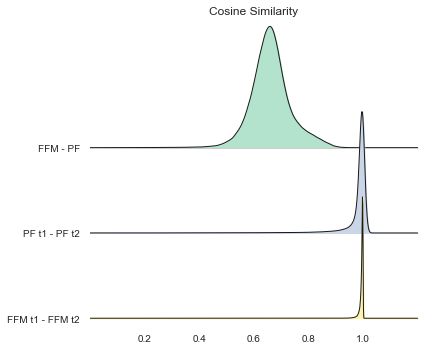

In [24]:
%matplotlib inline
fig, axes = joypy.joyplot(df4, ylim='own',overlap=1,grid="y", linewidth=1, legend=False, figsize=(6,5),
                          title="Cosine Similarity",
                          colormap=cm.Pastel2,x_range = [0,1.2])

In [40]:
df1['ffm1_ffm2']= df1['ffm1_ffm2'].apply(lambda x: pd.to_numeric(x))
df1['ffm2_pf2']= df1['ffm2_pf2'].apply(lambda x: pd.to_numeric(x))
df1['ffm1_pf1']= df1['ffm1_pf1'].apply(lambda x: pd.to_numeric(x))
df1['pf1_pf2']= df1['pf1_pf2'].apply(lambda x: pd.to_numeric(x))


/Users/galby/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/galby/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/galby/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [26]:
fig.savefig('sample.png')

In [39]:
type(df1['ffm1_ffm2'][1])

numpy.float64

In [104]:
df4

FFM - PF           PF t1 - PF t2         FFM t1 - FFM t2
0           NaN  [[0.9992827812744945]]  [[0.9991742989660706]]
1           NaN  [[0.9579228427201615]]  [[0.9973463609897977]]
2           NaN  [[0.9953576681777225]]  [[0.9973746431496844]]
3           NaN  [[0.9986229544371261]]  [[0.9964548057734278]]
4           NaN  [[0.9995542482728106]]  [[0.9963732625650755]]
...         ...                     ...                     ...
96677       NaN  [[0.9968162042410934]]   [[0.994549494851934]]
96678       NaN  [[0.9965108842933911]]  [[0.9983688265885953]]
96679       NaN                 [[1.0]]  [[1.0000000000000002]]
96680       NaN  [[0.9738292885152198]]  [[0.9987985258611259]]
96681       NaN  [[0.9973114366250083]]  [[0.9852390376693254]]

[193364 rows x 3 columns]